# Clase 4: Modelos de Clasificacion (kNN y Regresion Logistica)

In [1]:
%pip install pandas
%pip install matplotlib
%pip install statsmodels
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [6]:
import pandas as pd

# Load the dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "iris"]
iris = pd.read_csv(url, names=column_names)
iris = iris.dropna()
#solo nos quedaremos con las variantes iris setosa y iris versicolor. No consideraremos iris virginica
out_virginica_filter = iris['iris'] != 'Iris-virginica'
iris = iris[out_virginica_filter]
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris['iris_setosa'] = (iris['iris'] == 'Iris-setosa').astype(int)
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,iris,iris_setosa
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [8]:
iris = iris.drop(columns='iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,iris_setosa
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0
96,5.7,2.9,4.2,1.3,0
97,6.2,2.9,4.3,1.3,0
98,5.1,2.5,3.0,1.1,0


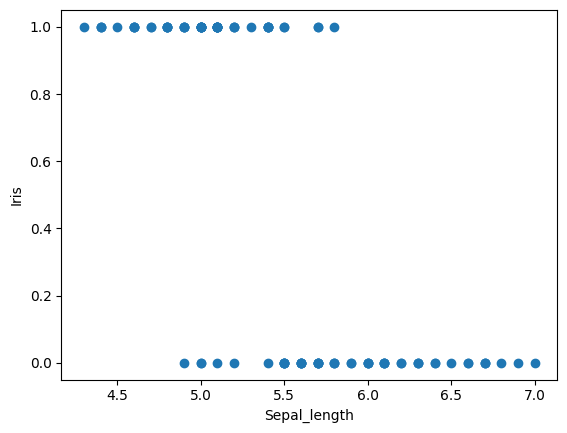

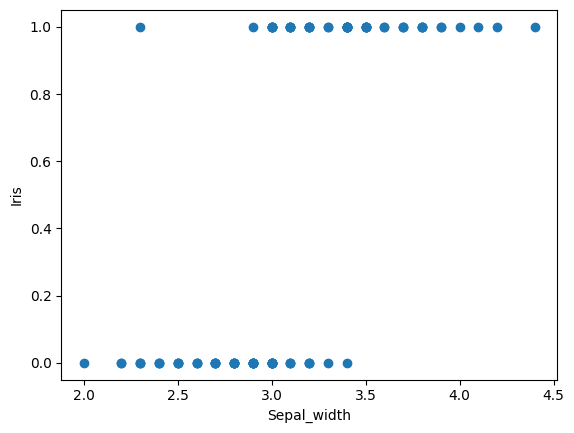

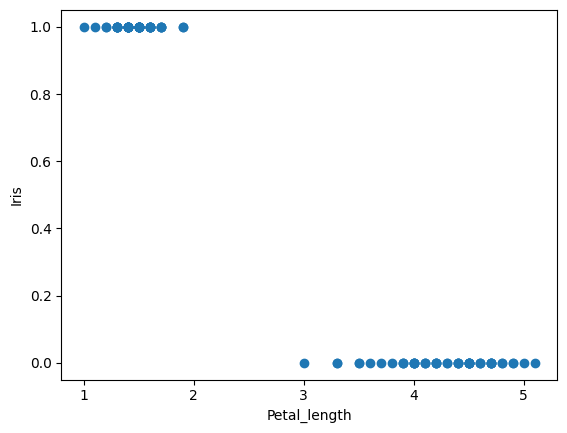

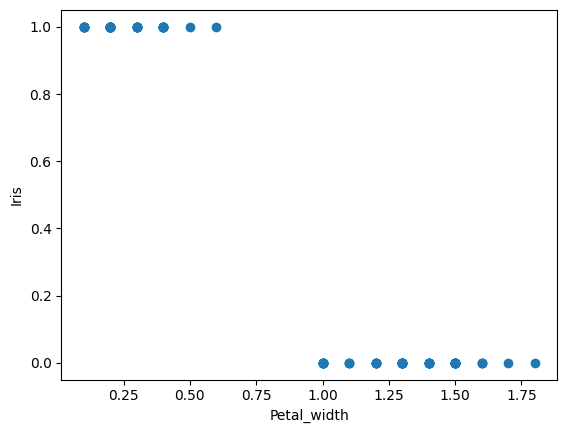

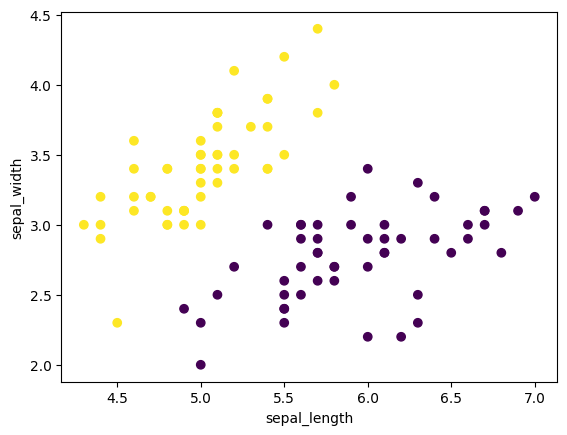

In [9]:
import matplotlib.pyplot as plt
for col in iris.columns:
  if(col != 'iris_setosa'):
    plt.scatter(iris[col], iris["iris_setosa"])
    plt.xlabel(col.capitalize())
    plt.ylabel("Iris")
    plt.show()

plt.scatter(iris['sepal_length'], iris['sepal_width'], cmap='viridis', c=iris["iris_setosa"])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

Regresion Logistica

In [10]:
y = iris["iris_setosa"].values
X = iris.drop(columns="iris_setosa")
x_train = X[:int(len(iris)*0.8)]
y_train = y[:int(len(iris)*0.8)]

x_test = X[:int(len(iris)*0.8)]
y_test = y[:int(len(iris)*0.8)]

from sklearn.linear_model import LogisticRegression
import numpy as np

clf = LogisticRegression(penalty=None, random_state=0).fit(x_train, y_train)

y_pred_proba = clf.predict_proba(x_test)
y_pred_proba[:5]

array([[2.63386778e-06, 9.99997366e-01],
       [3.15320030e-05, 9.99968468e-01],
       [8.45362438e-06, 9.99991546e-01],
       [6.14948956e-05, 9.99938505e-01],
       [1.93840143e-06, 9.99998062e-01]])

In [11]:
rounded_arr = np.round(y_pred_proba, 2)
rounded_arr[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

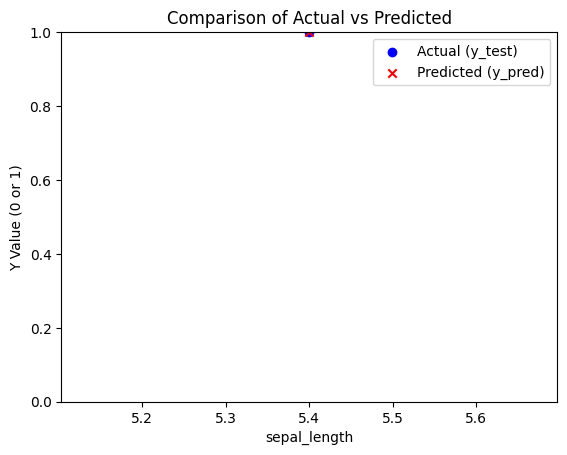

In [12]:
import random
index = random.randint(0, len(x_test))
plt.scatter(x_test["sepal_length"][index], y_test[index], color='blue', marker='o', label='Actual (y_test)')
plt.scatter(x_test["sepal_length"][index], clf.predict_proba(x_test)[index][1], color='red', marker='x', label='Predicted (y_pred)')
plt.xlabel('sepal_length')
plt.ylabel('Y Value (0 or 1)')
plt.title('Comparison of Actual vs Predicted')
plt.legend()
plt.ylim(0, 1)
plt.show()

Validaciones

In [13]:
y_pred = clf.predict(x_test)
sum(y_pred == y_test)
score = sum(y_pred == y_test) / len(y_test)
score

1.0